In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

def linear_function(x):
    return x



def activation_derivative(self, x):
    # Derivative of sigmoid activation function
    return sigmoid(x) * (1 - sigmoid(x))



def normalize_row(row):
    min_val = np.min(row)
    max_val = np.max(row)
    if min_val == max_val:  
        return row
    normalized_row = (row - min_val) / (max_val - min_val)
    return normalized_row

def normalize_array(arr):
    normalized_arr = np.apply_along_axis(normalize_row, 1, arr)
    return normalized_arr


def softmax(x):
    
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / np.sum(e_x, axis=0, keepdims=True)

def softmax_derivative(x):
    pass
# nie ma potrzeby korzystania z pochodnej funkcji softmax, ponieważ możemy do backpropagacji użyć funkcję kosztu, 
#która do softmaxa ma wygodną postać
# Ja używam entropię krzyżową:

def calculate_loss(real_y,predicted_y):
    m = real_y.shape[1]  
    log_likelihood = -np.log(predicted_y[real_y.argmax(axis=0), range(m)])  
    loss = np.sum(log_likelihood) / m
    return loss



def predict_classes(y_pred):
    return np.argmax(y_pred, axis=0)


def f_measure(y_true, y_predicted):
    y_true_flat = np.ravel(y_true)
    y_predicted_flat = np.ravel(y_predicted)

    f_measure = f1_score(y_true_flat, y_predicted_flat,average='micro')

    return f_measure
def linear(x):
    return x

In [3]:
class NeuralNetwork:
    def __init__(self, input_x, input_y, input_size, output_size, nodes_count_list, activation_function):

        self.input = input_x
        self.real_y = input_y
        self.layers = []
        self.loss = None
        self.error = None
        self.activation_function = activation_function
        self.input_size = input_size
        self.output_size = output_size





        weights = np.random.rand(nodes_count_list[0], input_size)
        biases = np.random.rand(nodes_count_list[0], 1)
        self.layers.append(Layer(nodes_count_list[0], weights, biases))

        for i in range(1, len(nodes_count_list)):
            weights = np.random.rand(nodes_count_list[i], nodes_count_list[i-1])
            biases = np.random.rand(nodes_count_list[i], 1)
            self.layers.append(Layer(nodes_count_list[i], weights, biases))

        weights = np.random.rand(output_size, nodes_count_list[-1])
        biases = np.random.rand(output_size, 1)
        self.output_layer = Layer(1, weights, biases)

        self.feedforward(self.input,self.real_y)

    def feedforward(self,input,output):
        self.layers[0].a = self.layers[0].weights.dot(input)+ self.layers[0].biases
        self.layers[0].values = sigmoid(self.layers[0].a )
        for i in range(1, len(self.layers)):
            self.layers[i].a = self.layers[i].weights.dot(self.layers[i - 1].values)+ self.layers[i].biases
            self.layers[i].values = sigmoid(
                self.layers[i].a )
        self.output_layer.a = self.output_layer.weights.dot(self.layers[-1].values)+ self.output_layer.biases
        self.output_layer.values = self.activation_function(
            self.output_layer.a )

        self.error = output - self.output_layer.values
        self.loss = calculate_loss(self.real_y, self.output_layer.values)

    def backpropagation(self, learning_rate, epochs):
        m = self.input.shape[1]

        for epoch in range(epochs):
            self.feedforward(self.input, self.real_y)
            
            # nie ma potrzeby korzystania z pochodnej funkcji softmax, ponieważ możemy do backpropagacji użyć funkcję straty 
            # np.entropii krzyżowej. Dla softmaxa pochodna z funkcji kosztu ma wygodną postać
            self.output_layer.e = self.error
            self.layers[-1].e = self.output_layer.weights.T.dot(self.output_layer.e) * sigmoid_derivative(
                self.layers[-1].values)
            for i in range(len(self.layers) - 2, -1, -1):
                self.layers[i].e = self.layers[i + 1].weights.T.dot(self.layers[i + 1].e) * sigmoid_derivative(
                    self.layers[i].values)

            self.output_layer.weights += learning_rate * self.output_layer.e.dot(
                sigmoid(self.layers[-1].values).T) / m
            self.output_layer.biases += learning_rate * np.sum(self.output_layer.e, axis=1,
                                                               keepdims=True) / m
            for i in range(len(self.layers) - 1, 0, -1):
                self.layers[i].weights += learning_rate * self.layers[i].e.dot(
                    sigmoid(self.layers[i - 1].values).T) / m
                self.layers[i].biases += learning_rate * np.sum(self.layers[i].e, axis=1,
                                                                keepdims=True) / m
            self.layers[0].weights += learning_rate * np.dot(self.layers[0].e, self.input.T) / m
            self.layers[0].biases += learning_rate * np.sum(self.layers[0].e, axis=1,
                                                            keepdims=True) / m

            if epoch % 100 == 0:
                self.feedforward(self.input, self.real_y)
                print(f"Epoch {epoch}: Loss = {self.loss}")







    def __str__(self):
        info = "Neural Network Information:\n"
        info += f"Input: {self.input}\n"
        info += f"Input_y: {self.real_y}\n"
        info += f"Weights and Biases:\n"
        for i, layer in enumerate(self.layers):
            info += f"Layer {i+1}:\n"
            info += f"Weights:\n{layer.weights}\n"
            info += f"Biases:\n{layer.biases}\n"
            info += f"Values:\n{layer.values}\n"
            info += f"a:\n{layer.a}\n"
            info += f"e:\n{layer.e}\n"


        info += f"Output Layer:\n"
        info += f"Weights:\n{self.output_layer.weights}\n"
        info += f"Biases:\n{self.output_layer.biases}\n"
        info += f"Values:\n{self.output_layer.values}\n"
        info += f"a:\n{self.output_layer.a}\n"
        info += f"e:\n{self.output_layer.e}\n"
        info += f"Activation Function: {self.activation_function.__name__}\n"
        info += f"Error: {self.error}\n"
        # info += f"MSE: {self.mse}\n"
        return info

class Layer:
    def __init__(self, nodes_count, weights, biases):
        self.values = None
        self.weights = weights
        self.biases = biases
        self.a = None
        self.e = None


## Easy


#### Inicjalizacja danych

In [4]:
df_training = pandas.read_csv("easy-training.csv")
df_test = pandas.read_csv("easy-test.csv")
df_training['c'] = df_training['c'].replace({True: 1, False: 0})
df_test['c'] = df_test['c'].replace({True: 1, False: 0})
    
x_train = df_training[['x','y']]
x_train = np.array(x_train).T
x_train = np.array(x_train).reshape(x_train.shape)
x_train_normalized = normalize_array(x_train)

y_train = df_training[['c']]
#one hot-encoding
num_classes = len(np.unique(y_train))
y_train = np.eye(num_classes)[y_train.squeeze()]
y_train = np.array(y_train).T
y_train = np.array(y_train).reshape(y_train.shape)

#### Uczenie

In [5]:
nodes_count_list = [100]
network = NeuralNetwork(x_train_normalized, y_train, 2, 2, nodes_count_list, softmax)
network2 = NeuralNetwork(x_train_normalized, y_train, 2, 2, nodes_count_list, linear)


learning_rate = 0.88
epochs = 10000
network.backpropagation(learning_rate,epochs)


Epoch 0: Loss = 10.050957614687393
Epoch 100: Loss = 0.5237117333543191
Epoch 200: Loss = 0.14593182565532187
Epoch 300: Loss = 0.11974528973877911
Epoch 400: Loss = 0.1037302562990715
Epoch 500: Loss = 0.09272329766868768
Epoch 600: Loss = 0.08457086357260214
Epoch 700: Loss = 0.07821931489845127
Epoch 800: Loss = 0.07308906852731306
Epoch 900: Loss = 0.06883245045064335
Epoch 1000: Loss = 0.06522673094269177
Epoch 1100: Loss = 0.062121716633089734
Epoch 1200: Loss = 0.05941189178088956
Epoch 1300: Loss = 0.057020608511781694
Epoch 1400: Loss = 0.05489062251090978
Epoch 1500: Loss = 0.05297817030718356
Epoch 1600: Loss = 0.05124912158362312
Epoch 1700: Loss = 0.04967639830953815
Epoch 1800: Loss = 0.04823819505326888
Epoch 1900: Loss = 0.046916721733893274
Epoch 2000: Loss = 0.04569729630767273
Epoch 2100: Loss = 0.04456767746943845
Epoch 2200: Loss = 0.04351756549427222
Epoch 2300: Loss = 0.042538223125392016
Epoch 2400: Loss = 0.041622183652494635
Epoch 2500: Loss = 0.04076302331000

#### F-miara


In [6]:
x_test = df_test[['x','y']]
x_test = np.array(x_test).T
x_test = np.array(x_test).reshape(x_test.shape)
x_test_normalized = normalize_row(x_test)

y_test = df_test[['c']]
y_test = np.array(y_test).T
y_test = np.array(y_test).reshape(y_test.shape)
network.feedforward(x_test_normalized,y_test)
network2.feedforward(x_test_normalized,y_test)

y_output = network.output_layer.values
y_pred = predict_classes(y_output)
y_pred = np.array(y_pred).reshape(1,len(y_pred))

y_output2 = network2.output_layer.values
y_pred2 = predict_classes(y_output2)
y_pred2 = np.array(y_pred2).reshape(1,len(y_pred2))

print("F-miara dla softmaxa:", f_measure(y_test, y_pred))
print("F-miara dla liniowego:", f_measure(y_test, y_pred2))


F-miara dla softmaxa: 0.994
F-miara dla liniowego: 0.504


#### Wykres

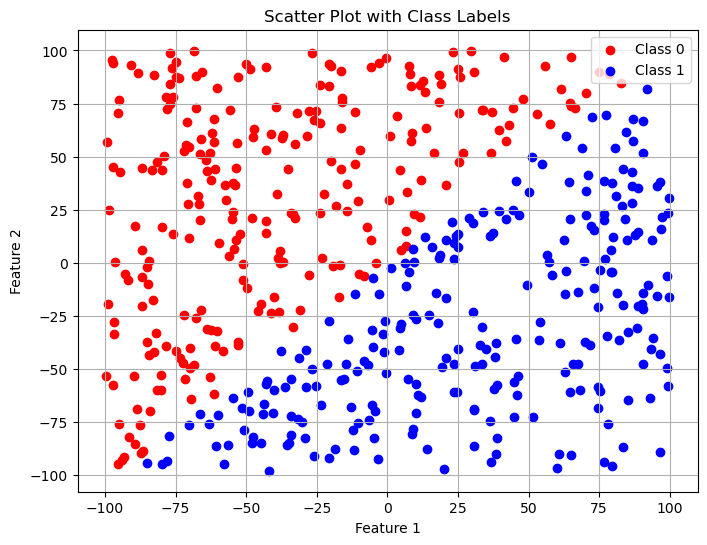

In [7]:
y_pred_flat = y_pred.flatten()

df = pandas.DataFrame({'c': y_pred_flat})
class_0 = df_test[df['c']==0]
class_1 = df_test[df['c'] == 1]


plt.figure(figsize=(8, 6))
plt.scatter(class_0['x'], class_0['y'], color='red', label='Class 0')
plt.scatter(class_1['x'], class_1['y'], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Class Labels')
plt.legend()
plt.grid(True)
plt.show()

### Rings3 -  regular


#### Inicjalizacja danych

In [8]:
df_training = pandas.read_csv("rings3-regular-training.csv")
df_test = pandas.read_csv("rings3-regular-test.csv")
df_training['c'] = df_training['c'].replace({True: 1, False: 0})
df_test['c'] = df_test['c'].replace({True: 1, False: 0})
    
x_train = df_training[['x','y']]
x_train = np.array(x_train).T
x_train = np.array(x_train).reshape(x_train.shape)
x_train_normalized = normalize_array(x_train)
#one hot-encoding

y_train = df_training[['c']]
num_classes = len(np.unique(y_train))
y_train = np.eye(num_classes)[y_train.squeeze()]
y_train = np.array(y_train).T
y_train = np.array(y_train).reshape(y_train.shape)


#### Trenowanie

In [9]:
nodes_count_list = [100]
network = NeuralNetwork(x_train_normalized, y_train, 2, 3, nodes_count_list, softmax)

learning_rate = 0.88
epochs = 10000
network.backpropagation(learning_rate,epochs)

Epoch 0: Loss = 11.477279732453704
Epoch 100: Loss = 1.320581234531935
Epoch 200: Loss = 1.103740001031363
Epoch 300: Loss = 1.04641998121389
Epoch 400: Loss = 1.0210175305604239
Epoch 500: Loss = 1.0055219028760978
Epoch 600: Loss = 0.9955420123866074
Epoch 700: Loss = 0.9892698672386083
Epoch 800: Loss = 0.9853205459676089
Epoch 900: Loss = 0.9827407875189986
Epoch 1000: Loss = 0.980947980778762
Epoch 1100: Loss = 0.9796055503585033
Epoch 1200: Loss = 0.978522891767978
Epoch 1300: Loss = 0.9775921681563576
Epoch 1400: Loss = 0.976751785219204
Epoch 1500: Loss = 0.9759660017966072
Epoch 1600: Loss = 0.975213681455844
Epoch 1700: Loss = 0.9744820983030213
Epoch 1800: Loss = 0.9737635259451556
Epoch 1900: Loss = 0.9730533849854553
Epoch 2000: Loss = 0.9723493249643281
Epoch 2100: Loss = 0.9716509924425342
Epoch 2200: Loss = 0.9709605360459831
Epoch 2300: Loss = 0.9702841877043921
Epoch 2400: Loss = 0.9696351973674611
Epoch 2500: Loss = 0.9690357083283339
Epoch 2600: Loss = 0.96850370214

#### F-miara

In [10]:
x_test = df_test[['x','y']]
x_test = np.array(x_test).T
x_test = np.array(x_test).reshape(x_test.shape)
x_test_normalized = normalize_row(x_test)

y_test = df_test[['c']]
y_test = np.array(y_test).T
y_test = np.array(y_test).reshape(y_test.shape)
network.feedforward(x_test_normalized,y_test)

y_output = network.output_layer.values
y_pred = predict_classes(y_output)
y_pred = np.array(y_pred).reshape(1,len(y_pred))

print("F-miara:", f_measure(y_test, y_pred))


F-miara: 0.834


#### wykres

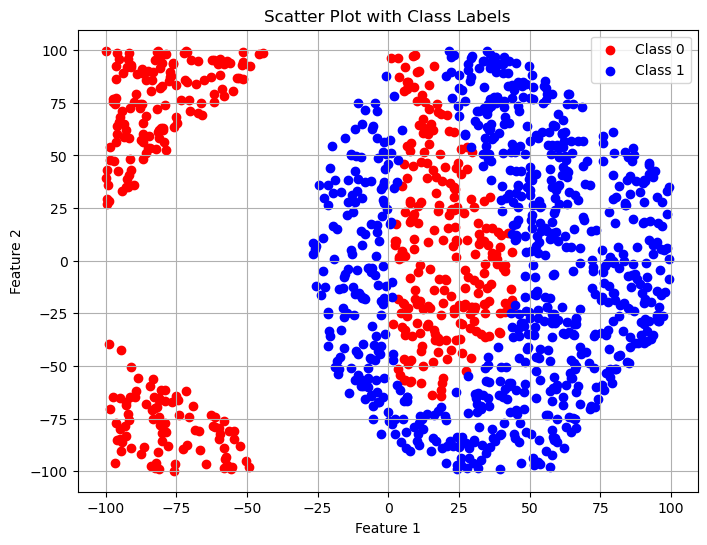

In [11]:
y_pred_flat = y_pred.flatten()

df = pandas.DataFrame({'c': y_pred_flat})
class_0 = df_test[df['c']==0]
class_1 = df_test[df['c'] == 1]


plt.figure(figsize=(8, 6))
plt.scatter(class_0['x'], class_0['y'], color='red', label='Class 0')
plt.scatter(class_1['x'], class_1['y'], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Class Labels')
plt.legend()
plt.grid(True)
plt.show()

## xor3

#### Inicjalizowanie danych

In [12]:
df_training = pandas.read_csv("xor3-training.csv")
df_test = pandas.read_csv("xor3-test.csv")
df_training['c'] = df_training['c'].replace({True: 1, False: 0})
df_test['c'] = df_test['c'].replace({True: 1, False: 0})
    
x_train = df_training[['x','y']]
x_train = np.array(x_train).T
x_train = np.array(x_train).reshape(x_train.shape)
x_train_normalized = normalize_array(x_train)
#one hot-encoding

y_train = df_training[['c']]
num_classes = len(np.unique(y_train))
y_train = np.eye(num_classes)[y_train.squeeze()]
y_train = np.array(y_train).T
y_train = np.array(y_train).reshape(y_train.shape)

#### Trenowanie modelu

In [ ]:
nodes_count_list = [10]
network = NeuralNetwork(x_train_normalized, y_train, 2, 2, nodes_count_list, softmax)

learning_rate = 0.88
epochs = 1000000
network.backpropagation(learning_rate,epochs)

Epoch 0: Loss = 1.0093210822015157
Epoch 100: Loss = 0.6968161695772319
Epoch 200: Loss = 0.6932021121790728
Epoch 300: Loss = 0.6930334819341158
Epoch 400: Loss = 0.6929182486233522
Epoch 500: Loss = 0.6928313484152124
Epoch 600: Loss = 0.6927657378905661
Epoch 700: Loss = 0.6927162987477973
Epoch 800: Loss = 0.6926790917332492
Epoch 900: Loss = 0.6926510406612272
Epoch 1000: Loss = 0.6926297520784815
Epoch 1100: Loss = 0.6926133884315142
Epoch 1200: Loss = 0.6926005632661456
Epoch 1300: Loss = 0.6925902490559436
Epoch 1400: Loss = 0.6925816966734862
Epoch 1500: Loss = 0.6925743674097586
Epoch 1600: Loss = 0.6925678778417966
Epoch 1700: Loss = 0.692561956760812
Epoch 1800: Loss = 0.6925564125867912
Epoch 1900: Loss = 0.6925511093629261
Epoch 2000: Loss = 0.6925459494448687
Epoch 2100: Loss = 0.6925408612240358
Epoch 2200: Loss = 0.6925357905272929
Epoch 2300: Loss = 0.6925306946395549
Epoch 2400: Loss = 0.6925255381622105
Epoch 2500: Loss = 0.6925202901354598
Epoch 2600: Loss = 0.6925

#### F-miara

In [14]:
x_test = df_test[['x','y']]
x_test = np.array(x_test).T
x_test = np.array(x_test).reshape(x_test.shape)
x_test_normalized = normalize_row(x_test)

y_test = df_test[['c']]
y_test = np.array(y_test).T
y_test = np.array(y_test).reshape(y_test.shape)
network.feedforward(x_test_normalized,y_test)

y_output = network.output_layer.values
y_pred = predict_classes(y_output)
y_pred = np.array(y_pred).reshape(1,len(y_pred))

print("F-miara:", f_measure(y_test, y_pred))

F-miara: 0.914


#### Wykres

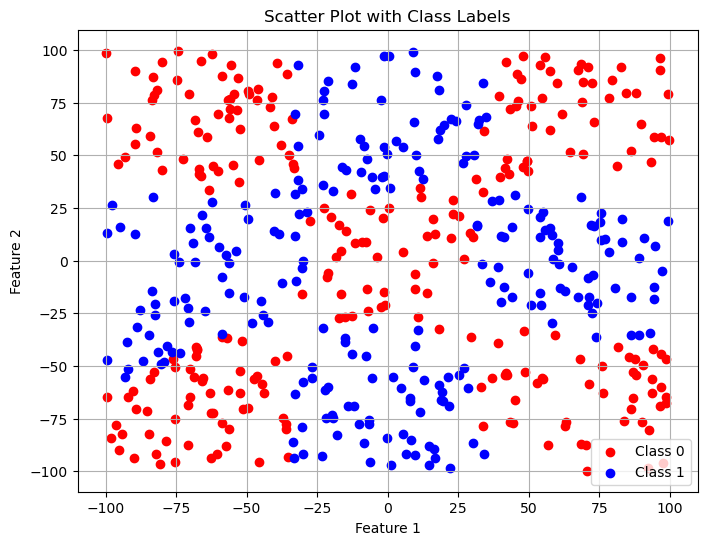

In [15]:
y_pred_flat = y_pred.flatten()

df = pandas.DataFrame({'c': y_pred_flat})
class_0 = df_test[df['c']==0]
class_1 = df_test[df['c'] == 1]


plt.figure(figsize=(8, 6))
plt.scatter(class_0['x'], class_0['y'], color='red', label='Class 0')
plt.scatter(class_1['x'], class_1['y'], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Class Labels')
plt.legend()
plt.grid(True)
plt.show()